In [1]:
#  必要なツールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  気温データ "Tokyo_month.xlsx" の読み取り
data = pd.read_excel("Tokyo_month.xlsx")

In [3]:
#  データ形式の確認
data

,date,temp
0,1900-01-01,1.6
1,1900-02-01,3.1
2,1900-03-01,5.7
3,1900-04-01,11.4
4,1900-05-01,17.3
5,1900-06-01,19.3
6,1900-07-01,22.8
7,1900-08-01,26.1
8,1900-09-01,22.6
9,1900-10-01,16.5


In [4]:
# データ形式の変更
data['date'] = pd.to_datetime(data['date'], format="%Y-%m")
data["month"] = data['date'].dt.strftime("%m")

In [5]:
#  変更された形式の確認
data

,date,temp,month
0,1900-01-01,1.6,01
1,1900-02-01,3.1,02
2,1900-03-01,5.7,03
3,1900-04-01,11.4,04
4,1900-05-01,17.3,05
5,1900-06-01,19.3,06
6,1900-07-01,22.8,07
7,1900-08-01,26.1,08
8,1900-09-01,22.6,09
9,1900-10-01,16.5,10


In [6]:
#  月平均の気温の計算
mon_ave = data.groupby(["month"]).mean()["temp"]

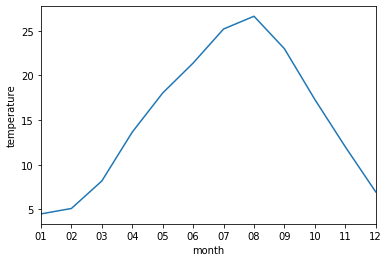

In [7]:
#  折れ線グラフの作成
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xticks(np.arange(12))
ax.set_ylabel("temperature")

mon_ave.plot(ax=ax)

plt.savefig("Tokyo_Ave_Month.png")